In [48]:
library(gaston)
library(vcfR)
library(dartR)

In [3]:
myg=read.vcfR("~/Mestrado_Files/ipyrad_files/ref_flavlib/falvlib_filt_20depth_VCF_BU/falvlib_filt_20depth_gi.recode.vcf")

Scanning file to determine attributes.
File attributes:
  meta lines: 10
  header_line: 11
  variant count: 137134
  column count: 189
Meta line 10 read in.
All meta lines processed.
gt matrix initialized.
Character matrix gt created.
  Character matrix gt rows: 137134
  Character matrix gt cols: 189
  skip: 0
  nrows: 137134
  row_num: 0
Processed variant: 137134
All variants processed


In [4]:
myg=myg[is.biallelic(myg),]

In [5]:
myg

***** Object of Class vcfR *****
180 samples
1160 CHROMs
136,481 variants
Object size: 233.6 Mb
0 percent missing data
*****        *****         *****

In [6]:
myg2=vcfR2genlight(myg)

In [14]:
 myg2=gl.compliance.check(myg2)

Starting gl.compliance.check 
  Processing genlight object with SNP data
  Consider filtering using gl <- gl.filter.allna(gl)
  The slot loc.all, which stores allele name for each locus, is empty. 
Creating a dummy variable (A/C) to insert in this slot. 
  Checking coding of SNPs
    SNP data scored NA, 0, 1 or 2 confirmed
  Checking locus metrics and flags
  Recalculating locus metrics
  Checking for monomorphic loci
    Dataset contains monomorphic loci
  Checking for loci with all missing data
    Dataset contains loci with all missing dat
  Checking whether individual names are unique.
  Checking for individual metrics
  Checking for population assignments
  Population assignments not detected, individuals assigned
                    to a single population labelled 'pop1'
  Spelling of coordinates checked and changed if necessary to 
            lat/lon
Completed: gl.compliance.check 


Starting gl.filter.callrate 
  Processing genlight object with SNP data
  Consider filtering using gl <- gl.filter.allna(gl)
                    calculations for filtering
  Recalculating Call Rate
  Removing individuals based on Call Rate, threshold = 0.3 
  Individuals deleted (CallRate <=  0.3 ):
CPB10sample[pop1], CPB112sample[pop1], CPB180sample[pop1], CPB185sample[pop1], CPB196sample[pop1], CPB199sample[pop1], CPB260sample[pop1], CPB440sample[pop1], CPB441sample[pop1], CPB445sample[pop1], CPB451sample[pop1], CPB452sample[pop1], CPB458sample[pop1], CPB516sample[pop1], CPB542sample[pop1], CPB544sample[pop1], CPB551sample[pop1], CPB558sample[pop1], CPB559sample[pop1], CPB598sample[pop1], CPB603sample[pop1], CPB612sample[pop1], CPB625sample[pop1],
  Note: Locus metrics not recalculated
  Note: Resultant monomorphic loci not deleted
Completed: gl.filter.callrate 


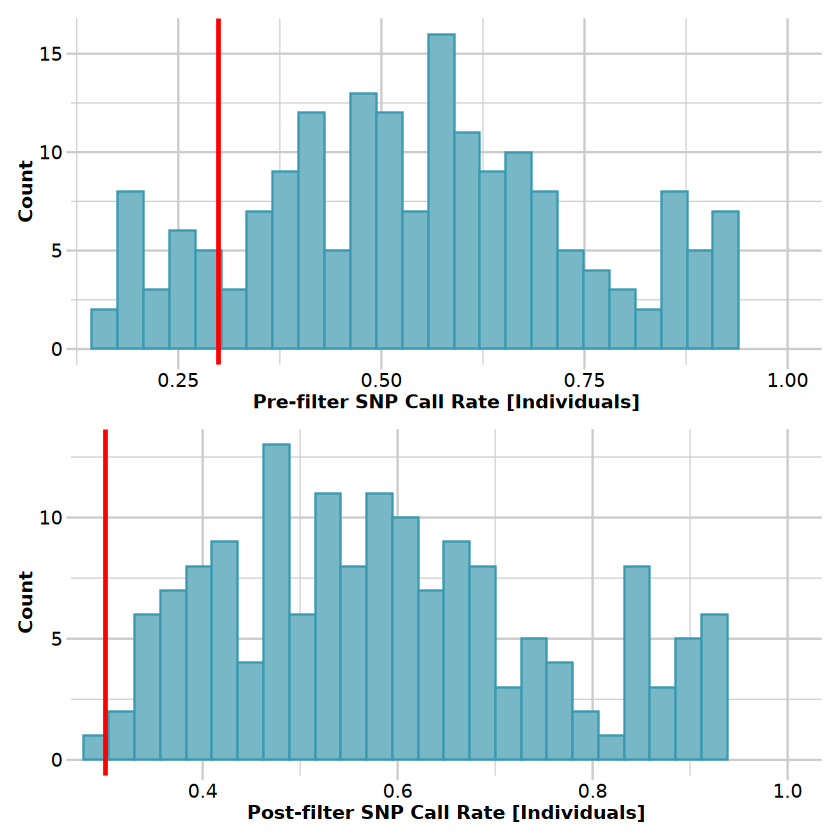

In [17]:
myg2=gl.filter.callrate(myg2, method = "ind", threshold = 0.3)

Starting gl.filter.callrate 
  Processing genlight object with SNP data
  Consider filtering using gl <- gl.filter.allna(gl)
                    calculations for filtering
  Recalculating Call Rate
  Removing loci based on Call Rate, threshold = 0.95 
Completed: gl.filter.callrate 


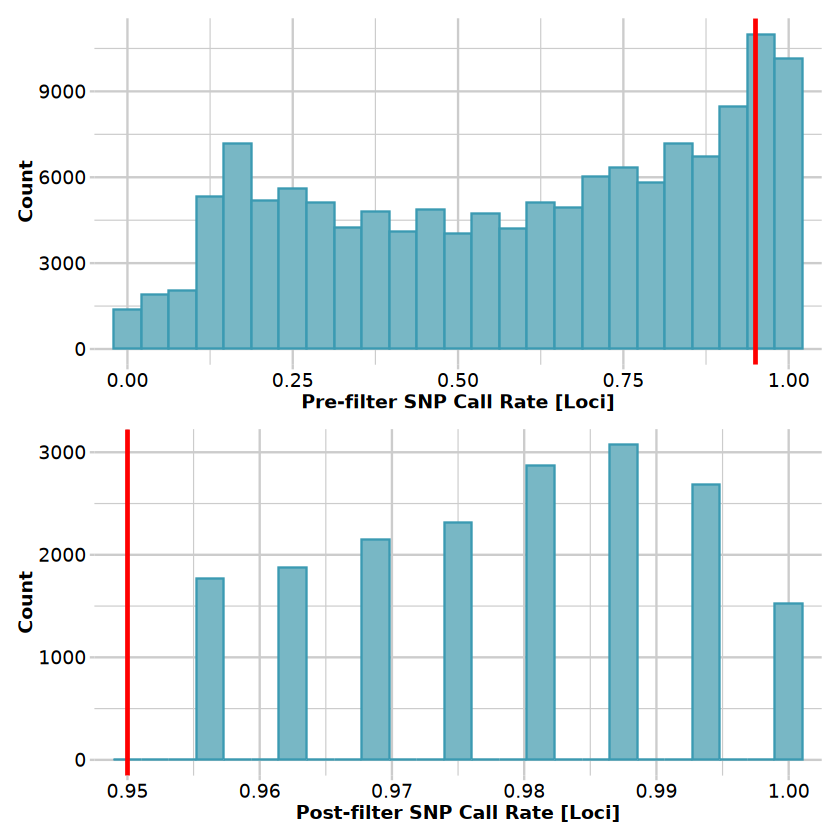

In [18]:
myg2=gl.filter.callrate(myg2, threshold = 0.95)

In [56]:
myg2 <- gl.filter.allna(myg2)
myg2 <- gl.filter.monomorphs(myg2)

Starting gl.filter.allna 
  Processing genlight object with SNP data
  Identifying and removing loci and individuals scored all 
                missing (NA)
  Deleting loci that are scored as all missing (NA)
  Deleting individuals that are scored as all missing (NA)
Completed: gl.filter.allna 
Starting gl.filter.monomorphs 
  Processing genlight object with SNP data
  Identifying monomorphic loci
  Removing monomorphic loci and loci with all missing 
                       data
Completed: gl.filter.monomorphs 


In [23]:
meta<-read.table("../test/Metadata_SecondAssembly_f.txt", header=T)
meta<-meta[meta$samples%in%myg2$ind.names,]
meta<-meta[match(myg2$ind.names, meta$samples),] 

In [36]:
meta[meta$Species_STR2=="flavius","POP"]<-2
meta[meta$Species_STR2=="hibrido","POP"]<-1
meta[meta$Species_STR2=="libidinosus","POP"]<-1

In [37]:
myg2$pop<-as.factor(meta$POP)

In [42]:
myg2@other$loc.metrics$position<-myg2@position
myg2@other$loc.metrics$chromosome<-myg2@chromosome

In [ ]:
gl2plink(myg2, plink_path = "/data/home/lucas.freitas/bin/miniconda3/envs/renv/bin/plink", outfile = "gwascourse.vcf", outpath = "./",snp_pos = "position",snp_chr = "chromosome")

In [57]:
g<-read.bed.matrix("../test/gwascourse")

Reading ../test/gwascourse.fam 
Reading ../test/gwascourse.bim 
Reading ../test/gwascourse.bed 
ped stats and snps stats have been set. 
'p' has been set. 
'mu' and 'sigma' have been set.


In [58]:
ld.g <- LD(g, c(1,ncol(g)))

In [63]:
length(colnames(ld.g))

[1] 16111

In [59]:
ld.g[1:20,1:20]

,loc3_pos78,loc19_pos66,loc19_pos139,loc26_pos217,loc26_pos304,loc63_pos47,loc63_pos105,loc66_pos150,loc66_pos159,loc74_pos166,loc74_pos168,loc83_pos64,loc83_pos192,loc89_pos18,loc89_pos23,loc89_pos218,loc100_pos212,loc107_pos312,loc107_pos470,loc112_pos9
loc3_pos78,1.000000e+00,5.801762e-03,4.271328e-05,4.557919e-05,1.297750e-08,0.0595789423,0.0595378096,6.382128e-04,4.618691e-05,2.354067e-03,4.498339e-05,1.441541e-04,4.271328e-05,2.869026e-04,4.557919e-05,5.696414e-03,4.557919e-05,4.825879e-04,1.138498e-03,0.0002405078
loc19_pos66,5.801762e-03,1.000000e+00,1.102511e-03,1.080487e-03,2.390106e-02,0.0022231317,0.0023284138,5.338531e-02,1.967549e-02,1.096595e-02,5.662409e-03,3.566846e-02,5.685298e-03,8.138831e-05,1.127976e-03,1.888193e-02,1.080487e-03,1.730768e-02,3.068438e-03,0.0026735454
loc19_pos139,4.271328e-05,1.102511e-03,1.000000e+00,8.810490e-34,7.887940e-34,0.0598850101,0.0598459703,6.139788e-04,4.443312e-05,2.264679e-03,4.327529e-05,8.867120e-34,4.109139e-05,2.795584e-04,4.384848e-05,5.685945e-03,4.384848e-05,1.554420e-01,1.171077e-03,0.0002313753
loc26_pos217,4.557919e-05,1.080487e-03,8.810490e-34,1.000000e+00,8.692679e-34,0.0009216259,0.0009360119,2.392216e-07,1.731226e-08,4.452653e-08,2.997536e-08,7.851709e-03,4.384848e-05,3.025638e-07,4.745685e-08,6.153852e-06,9.996515e-01,1.235431e-05,8.111660e-07,0.0002406494
loc26_pos304,1.297750e-08,2.390106e-02,7.887940e-34,8.692679e-34,1.000000e+00,0.0895086790,0.0887566583,2.527780e-02,6.232008e-02,2.319155e-02,1.055825e-02,1.259655e-02,1.838817e-03,1.129517e-02,1.771637e-03,7.508008e-03,2.779612e-08,2.197716e-02,5.107837e-02,0.0050094123
loc63_pos47,5.957894e-02,2.223132e-03,5.988501e-02,9.216259e-04,8.950868e-02,1.0000000000,0.9989158883,1.431006e-02,6.026723e-02,3.131476e-02,1.081187e-03,8.978106e-02,1.121364e-02,2.277415e-03,1.035878e-03,4.724388e-02,1.095507e-03,6.742181e-02,2.925809e-02,0.1092196152
loc63_pos105,5.953781e-02,2.328414e-03,5.984597e-02,9.360119e-04,8.875666e-02,0.9989158883,1.0000000000,1.452166e-02,6.022480e-02,3.079251e-02,1.096759e-03,9.012570e-02,1.118082e-02,2.235595e-03,1.051191e-03,4.683431e-02,1.096788e-03,6.710148e-02,2.770644e-02,0.1090048774
loc66_pos150,6.382128e-04,5.338531e-02,6.139788e-04,2.392216e-07,2.527780e-02,0.0143100555,0.0145216613,1.000000e+00,6.141353e-04,3.298173e-02,6.302411e-04,1.130928e-01,6.139788e-04,2.908161e-03,6.468551e-04,3.050636e-02,4.252828e-07,6.843424e-03,1.506291e-02,0.0034132609
loc66_pos159,4.618691e-05,1.967549e-02,4.443312e-05,1.731226e-08,6.232008e-02,0.0602672255,0.0602248010,6.141353e-04,1.000000e+00,1.197901e-02,4.561001e-05,8.184430e-03,4.443312e-05,2.104611e-04,4.681235e-05,5.849136e-03,3.077735e-08,4.952527e-04,1.090090e-03,0.0002470148
loc74_pos166,2.354067e-03,1.096595e-02,2.264679e-03,4.452653e-08,2.319155e-02,0.0313147628,0.0307925105,3.298173e-02,1.197901e-02,1.000000e+00,7.236200e-02,1.669539e-03,2.264679e-03,2.023762e-02,1.220936e-02,3.430583e-02,4.452653e-08,5.793252e-04,1.844701e-02,0.0056060497


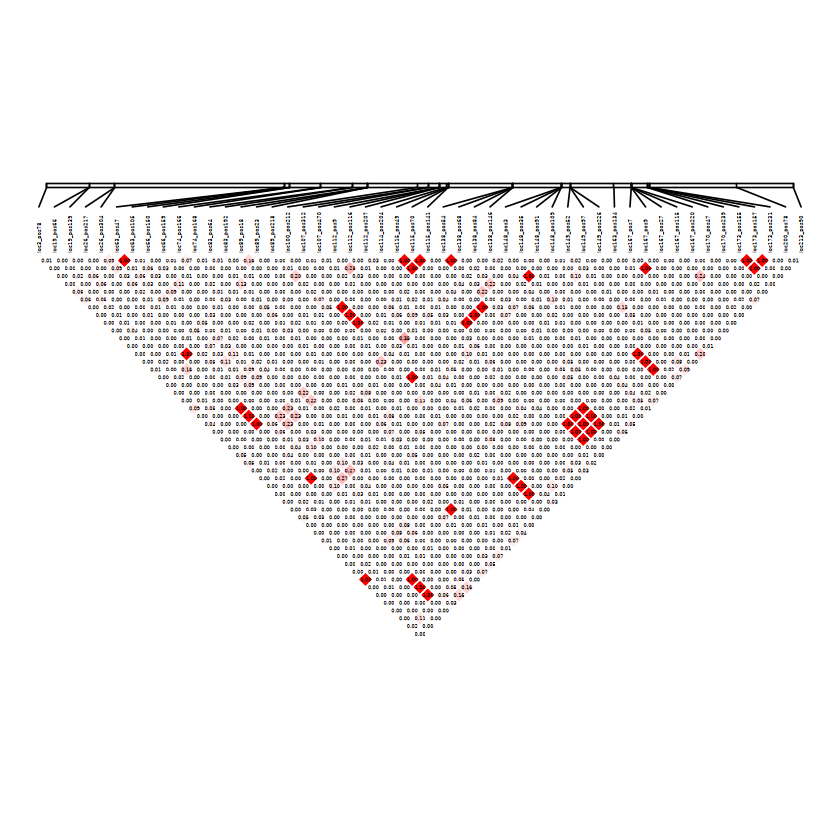

In [61]:
LD.plot( ld.g[1:50,1:50], snp.positions = g@snps$pos[1:50])

In [2]:
read.csv("../results/Plots/Metadata/meta_str_admix_K2.csv")

samples,Species_STR2,POP,Procedencia,Latitude,Longitude,CRS,ADMIX_Cluster1,ADMIX_Cluster2,STR_Cluster1,STR_Cluster2
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
CPB114sample,hibrido,-,cativeiro,NA,NA,NA,0.255415,0.744585,0.258,0.742
CPB115sample,hibrido,-,cativeiro,NA,NA,NA,0.241161,0.758839,0.244,0.756
CPB128sample,libidinosus,lib_cat,cativeiro,NA,NA,NA,0.999990,0.000010,0.999,0.001
CPB129sample,flavius,CdI,cativeiro,NA,NA,NA,0.000010,0.999990,0.000,1.000
CPB132sample,flavius,Mixed,cativeiro,NA,NA,NA,0.101914,0.898086,0.105,0.895
CPB13sample,hibrido,-,cativeiro,NA,NA,NA,0.245947,0.754053,0.248,0.752
CPB145sample,hibrido,-,cativeiro,NA,NA,NA,0.770274,0.229726,0.771,0.229
CPB146sample,flavius,Japungu,cativeiro,NA,NA,NA,0.000010,0.999990,0.000,1.000
CPB171sample,hibrido,-,cativeiro,NA,NA,NA,0.653972,0.346028,0.655,0.345


In [41]:
fam=read.table("~/GWAS_2024/data/continuous/gwascourse.fam")

In [42]:
meta=read.csv("../results/Plots/Metadata/meta_str_admix_K2.csv")

In [ ]:
meta

In [50]:
samps=fam$V2[!fam$V2%in%meta$samples]

In [ ]:
meta

In [48]:
meta[meta$samples%in%fam$V2,"STR_Cluster2"]

[1] 0.742 0.756 0.001 1.000 0.895 0.752 0.229 1.000 0.345 0.304 0.064 0.001
 [13] 0.331 0.445 0.321 0.026 0.104 0.073 0.098 0.085 0.492 0.465 0.881 0.996
 [25] 0.999 0.999 0.729 0.743 0.000 0.000 0.000 0.000 0.000 0.286 0.487 0.745
 [37] 0.359 0.501 0.258 0.878 0.070 0.089 0.280 0.266 1.000 1.000 1.000 0.998
 [49] 1.000 1.000 1.000 1.000 1.000 1.000 0.102 0.762 0.932 0.230 1.000 1.000
 [61] 1.000 0.310 0.191 0.871 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 [73] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000 1.000
 [85] 1.000 0.955 1.000 1.000 1.000 1.000 1.000 0.283 0.341 0.331 0.716 0.749
 [97] 0.733 0.726 0.738 0.776 0.740 0.543 0.522 1.000 1.000 1.000 0.999 1.000
[109] 1.000 1.000 1.000 1.000 1.000 1.000 1.000 0.924 1.000 1.000 1.000 1.000
[121] 1.000 1.000 1.000 1.000 0.999 0.999 1.000 0.999 1.000 1.000 1.000 1.000
[133] 1.000 0.999 1.000 0.940 0.928 0.940 0.880 0.893 0.005 0.219 0.217 0.001
[145] 0.012 0.000 0.000 0.000 0.044 0.086

In [49]:
fam[fam$V2%in%meta$samples,"V6"]=meta[meta$samples%in%fam$V2,"STR_Cluster2"]

In [51]:
samps

[1] "CPB201sample" "CPB450sample" "CPB536sample" "CPB577sample" "CPB596sample"
[6] "DT01sample"   "DT05sample"

In [57]:
fam[fam$V2==samps[3],"V6"]

[1] 0.738

In [58]:
fam[fam$V2==samps[5],"V6"]

[1] 1

In [ ]:
536
596

In [61]:
write.table(fam, "~/GWAS_2024/data/continuous/gwascourse.fam", quote = FALSE, row.names = FALSE, col.names = FALSE)